In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

Saving results.csv to results.csv


In [6]:
data = pd.read_csv("results.csv")
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
winner = [] # 빈리스트를 설정하고 값을 채운후 data라는 dataframe에 새로운 칼럼으로 추가할 예정
for i in range(len(data['date'])):
    if data['home_score'][i] > data['away_score'][i]:
        winner.append(data['home_team'][i])
    elif data['home_score'][i] < data['away_score'][i]:
        winner.append(data['away_team'][i])
    else:
        winner.append("Tie")
        
data['winning_team'] = winner

data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


In [8]:
data = data.drop(['tournament', 'city'], axis=1)
data.head()

,date,home_team,away_team,home_score,away_score,country,neutral,winning_team
0,1872-11-30,Scotland,England,0,0,Scotland,False,Tie
1,1873-03-08,England,Scotland,4,2,England,False,England
2,1874-03-07,Scotland,England,2,1,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,England,False,Tie
4,1876-03-04,Scotland,England,3,0,Scotland,False,Scotland


In [9]:
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.strftime('%Y')
data.head()

,date,home_team,away_team,home_score,away_score,country,neutral,winning_team
0,1872,Scotland,England,0,0,Scotland,False,Tie
1,1873,England,Scotland,4,2,England,False,England
2,1874,Scotland,England,2,1,Scotland,False,Scotland
3,1875,England,Scotland,2,2,England,False,Tie
4,1876,Scotland,England,3,0,Scotland,False,Scotland


In [0]:
data = data.astype({'date' : int})

In [11]:
type(data['neutral'][0])

numpy.bool_

In [0]:
data_all = data
len(data_all[data_all['neutral'] == True])

data_false = data_all[data_all['neutral'] == False]
data_true = data_all[data_all['neutral'] == True]

In [2]:
data_all_england = data_all[(data_all['home_team'] == 'England') | (data_all['away_team'] == 'England')]
data_all_england.head()

NameError: name 'data_all' is not defined

In [14]:
data_false_england = data_false[(data_false['home_team'] == 'England') | (data_false['away_team'] == 'England')]
data_false_england.head()

,date,home_team,away_team,home_score,away_score,country,neutral,winning_team
0,1872,Scotland,England,0,0,Scotland,False,Tie
1,1873,England,Scotland,4,2,England,False,England
2,1874,Scotland,England,2,1,Scotland,False,Scotland
3,1875,England,Scotland,2,2,England,False,Tie
4,1876,Scotland,England,3,0,Scotland,False,Scotland


In [15]:
data_true_england = data_true[(data_true['home_team'] == 'England') | (data_true['away_team'] == 'England')]
data_true_england.head()

,date,home_team,away_team,home_score,away_score,country,neutral,winning_team
3113,1950,Chile,England,0,2,Brazil,True,England
3121,1950,England,United States,0,1,Brazil,True,United States
3127,1950,England,Spain,0,1,Brazil,True,Spain
3646,1954,Belgium,England,4,4,Switzerland,True,Tie
3660,1954,England,Uruguay,2,4,Switzerland,True,Uruguay


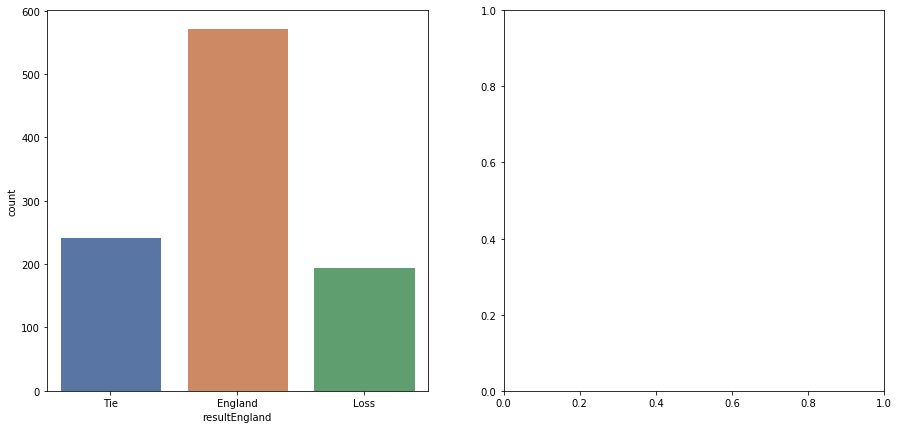

In [16]:
winrate_all = []
for row in data_all_england['winning_team']:
    if row != 'England' and row != 'Tie':
        winrate_all.append('Loss')
    else:
        winrate_all.append(row)
dfwinrate_all = pd.DataFrame(winrate_all, columns=['resultEngland'])

import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15,7, 5.27)
sns.set(style = 'darkgrid')
sns.countplot(x='resultEngland', data=dfwinrate_all, ax = ax[0])

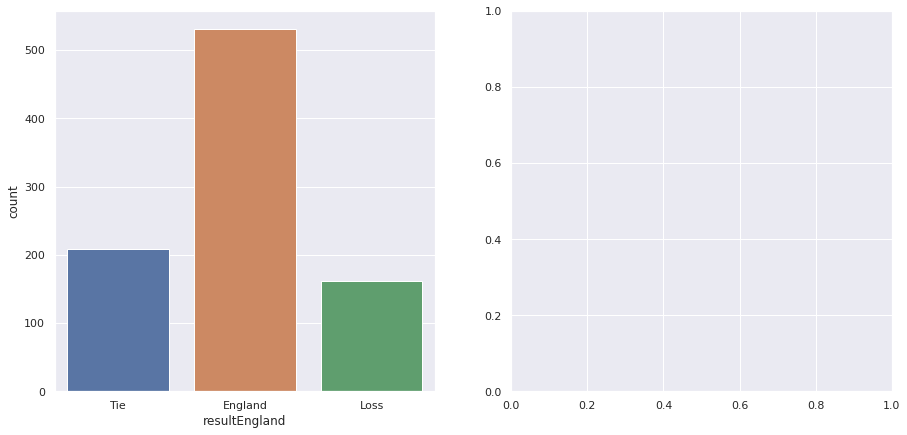

In [17]:
winrate_false = []
for row in data_false_england['winning_team']:
    if row != 'England' and row != 'Tie':
        winrate_false.append('Loss')
    else:
        winrate_false.append(row)
dfwinrate_false = pd.DataFrame(winrate_false, columns=['resultEngland'])

import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15,7, 5.27)
sns.set(style = 'darkgrid')
sns.countplot(x='resultEngland', data=dfwinrate_false, ax = ax[0])

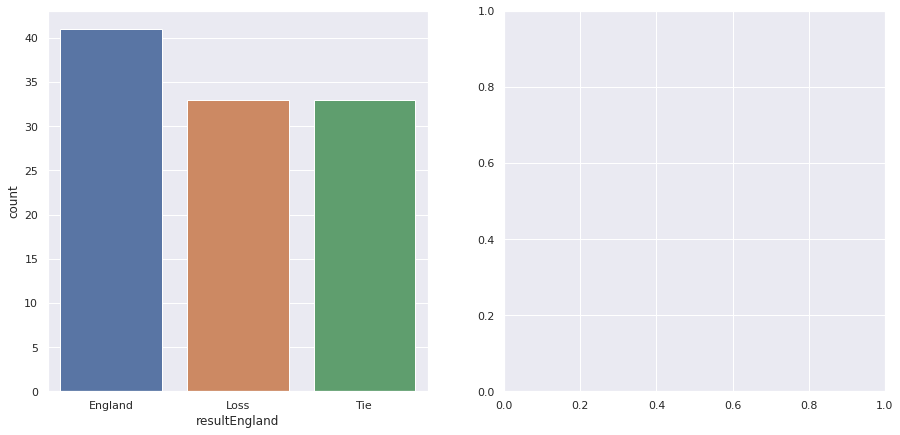

In [18]:
winrate_true = []
for row in data_true_england['winning_team']:
    if row != 'England' and row != 'Tie':
        winrate_true.append('Loss')
    else:
        winrate_true.append(row)
dfwinrate_true = pd.DataFrame(winrate_true, columns=['resultEngland'])

import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15,7, 5.27)
sns.set(style = 'darkgrid')
sns.countplot(x='resultEngland', data=dfwinrate_true, ax = ax[0])

In [19]:
# 홈/어웨이가 존재하는 데이터로 시험해보자
eng_team = ['England']
scot_team = ['Scotland']

# England경기 데이터 중 'England vs Scotland'' 경기만 존재하는 데이터프레임으로 축소
df_home_team = data_false_england[data_false_england['home_team'].isin(eng_team)]
df_away_team = data_false_england[data_false_england['away_team'].isin(scot_team)]
eng_scot_matches = pd.concat((df_home_team, df_away_team))
eng_scot_matches.count()

date            504
home_team       504
away_team       504
home_score      504
away_score      504
country         504
neutral         504
winning_team    504
dtype: int64

In [20]:
eng_scot_matches = eng_scot_matches[eng_scot_matches['away_team'] == 'Scotland']
eng_scot_matches.head()

,date,home_team,away_team,home_score,away_score,country,neutral,winning_team
1,1873,England,Scotland,4,2,England,False,England
3,1875,England,Scotland,2,2,England,False,Tie
6,1877,England,Scotland,1,3,England,False,Scotland
11,1879,England,Scotland,5,4,England,False,England
17,1881,England,Scotland,1,6,England,False,Scotland


In [0]:
# 해당 데이터에서 필요없는 features 제거
eng_scot_matches = eng_scot_matches.drop(['date','home_score','away_score','country','neutral'], axis=1)
                                        # neutral를 버리는 이유는 이미 neutral기준으로 데이터를 나눴기 때문

In [22]:
eng_scot_matches.head()

,home_team,away_team,winning_team
1,England,Scotland,England
3,England,Scotland,Tie
6,England,Scotland,Scotland
11,England,Scotland,England
17,England,Scotland,Scotland


In [23]:
eng_scot_matches = eng_scot_matches[eng_scot_matches['winning_team'] != 'Tie']
eng_scot_matches.head()

,home_team,away_team,winning_team
1,England,Scotland,England
6,England,Scotland,Scotland
11,England,Scotland,England
17,England,Scotland,Scotland
26,England,Scotland,Scotland


In [24]:
eng_scot_matches.count()

home_team       92
away_team       92
winning_team    92
dtype: int64

In [25]:
# 예측값들을 0,1,2로  처리

df_matches = eng_scot_matches
df_matches.loc[df_matches.winning_team == df_matches.home_team, 'winning_team'] = 1
df_matches.loc[df_matches.winning_team == df_matches.away_team, 'winning_team'] = 0

df_matches.head()

,home_team,away_team,winning_team
1,England,Scotland,1
6,England,Scotland,0
11,England,Scotland,1
17,England,Scotland,0
26,England,Scotland,0


In [26]:
df_matches_tf = df_matches
df_matches_tf.loc[df_matches_tf.home_team == 'England', 'home_team'] = 1
df_matches_tf.loc[df_matches_tf.away_team == 'Scotland', 'away_team'] = 0
df_matches_tf.head()

,home_team,away_team,winning_team
1,1,0,1
6,1,0,0
11,1,0,1
17,1,0,0
26,1,0,0


In [39]:
results = df_matches_tf.drop(['home_team','away_team'], axis=1)
print(results)

       winning_team
1                 1
6                 0
11                1
17                0
26                0
...             ...
14930             1
19667             1
22380             0
35346             1
38435             1

[92 rows x 1 columns]


In [0]:
matches_results = results['winning_team'].values.tolist()


In [33]:
matches = df_matches_tf.drop(['winning_team'], axis=1)
matches.head()


,home_team,away_team
1,1,0
6,1,0
11,1,0
17,1,0
26,1,0


In [0]:
matches = matches.values.tolist()

In [35]:
print(matches)

[[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0]]


In [53]:
import tensorflow as tf
%tensorflow_version 1.x

x_data = matches
y_data = matches_results

X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    feed = {X : x_data, Y : y_data}
    for step in range(50):
        sess.run(train, feed_dict=feed)
        if step % 10 == 0:
            print(step, sess.run(cost, feed_dict=feed))
            
    h, c, a = sess,run([hypothesis, predicted, accuracy], feed_dict=feed)
    print("\nHypothesis :", h, "\nCorrect (Y) :", c, "\nAccuracy :", a)

ValueError: ignored